In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

In [7]:
#pip install WordCloud

# Load data

In [8]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.shape

(5572, 2)

In [10]:
data.isna().sum()

Category    0
Message     0
dtype: int64

Let us start by checking the number of spam and ham messages we have in our dataset

In [11]:
data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

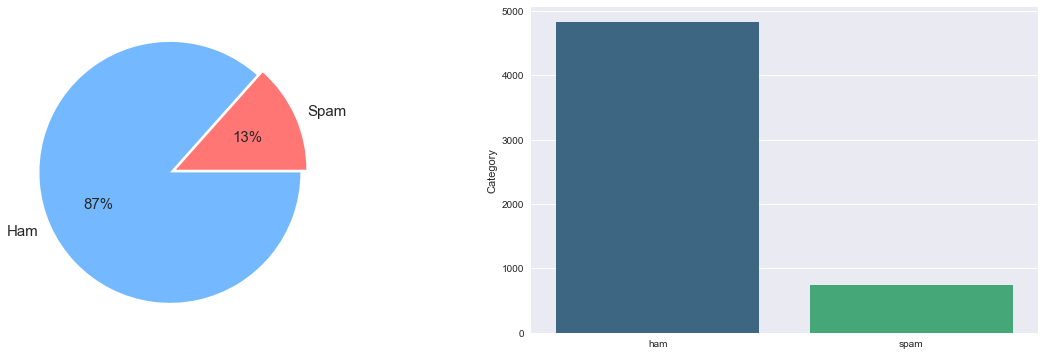

In [12]:
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']
plt.style.use('seaborn')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.pie(sizes,labels=labels,textprops={'fontsize': 15},
        colors=custom_colours,autopct='%1.0f%%',explode=[0, 0.05])
                                                                      
plt.subplot(1, 2, 2)
sns.barplot(x = data['Category'].unique(), y = data['Category'].value_counts(), 
            palette= 'viridis')

plt.show()

counting wards and letters

In [14]:
data['Total Words']=data['Message'].apply(lambda x:len(x.split()))


def count_total_words(text):
    char=0
    for word in text.split():
        char+=len(word)
    return char

data['Total Chars'] = data["Message"].apply(count_total_words)
    

In [15]:
data.head()

,Category,Message,Total Words,Total Chars
0,ham,"Go until jurong point, crazy.. Available only ...",20,92
1,ham,Ok lar... Joking wif u oni...,6,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128
3,ham,U dun say so early hor... U c already then say...,11,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49


We have created 2 new features in our dataset, lets try to see how our target variable changes based on these features

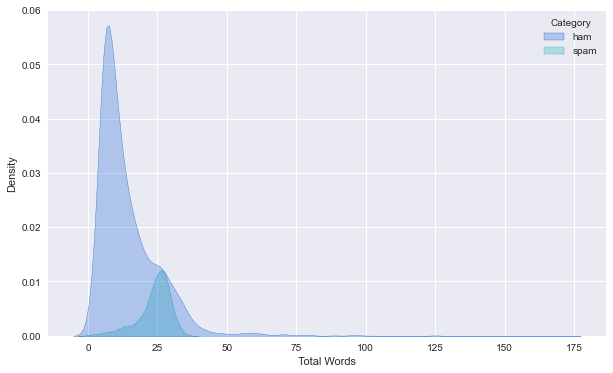

In [16]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['Category'], palette= 'winter', shade = True)
plt.show()

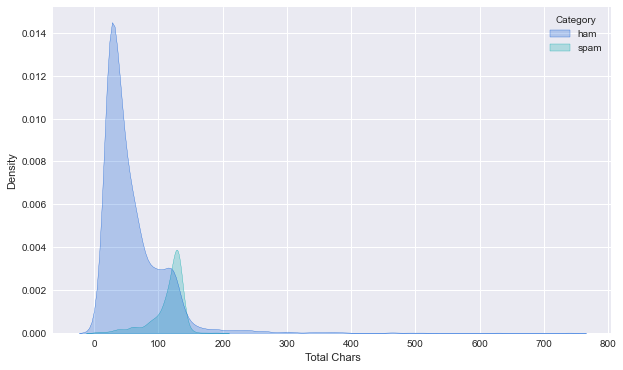

In [17]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Chars'], hue= data['Category'], palette= 'winter', shade = True)
plt.show()

Clearly, one thing we can conclude here is that more the number of words in a text, there are more chances of it being spam

In [18]:
data.head()

,Category,Message,Total Words,Total Chars
0,ham,"Go until jurong point, crazy.. Available only ...",20,92
1,ham,Ok lar... Joking wif u oni...,6,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128
3,ham,U dun say so early hor... U c already then say...,11,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49


Text lowercasing

In [19]:
def convert_lowercase(text):
    text = text.lower()
    return text

data['Message'] = data['Message'].apply(convert_lowercase)

# Data visualization

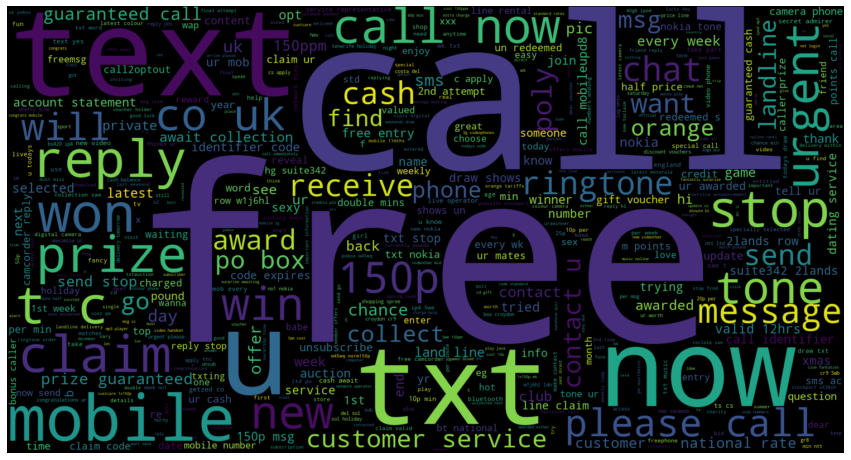

In [20]:
text = " ".join(data[data['Category'] == 'spam']['Message'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

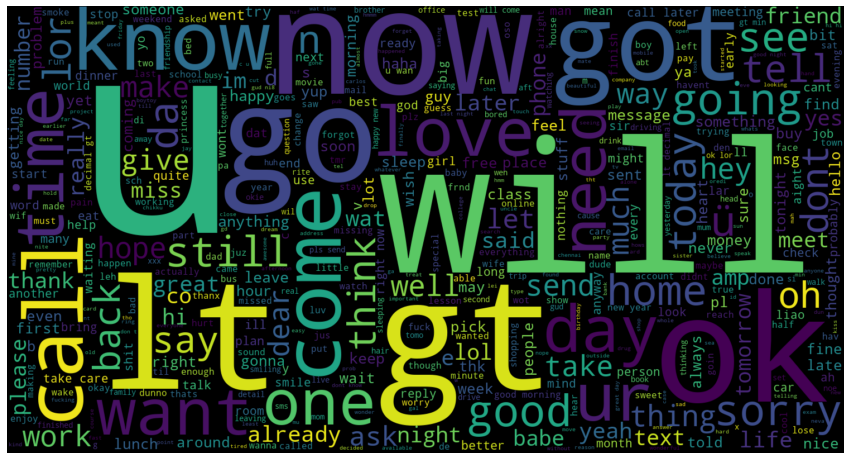

In [21]:
text = " ".join(data[data['Category'] == 'ham']['Message'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
data['Category'] = data['Category'].replace({'spam':0,'ham':1})

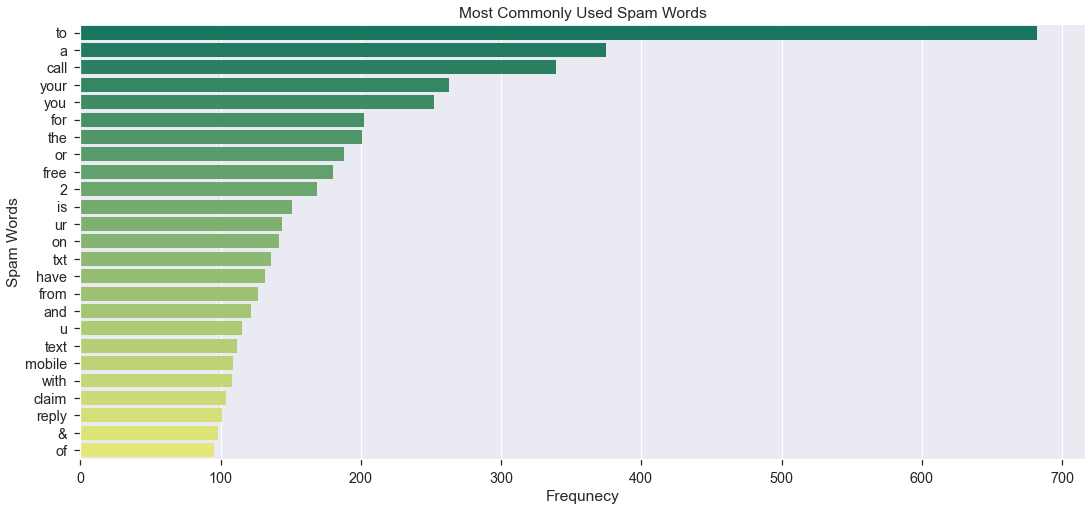

In [23]:
all_spam_words = []
for sentence in data[data['Category'] == 0]['Message'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

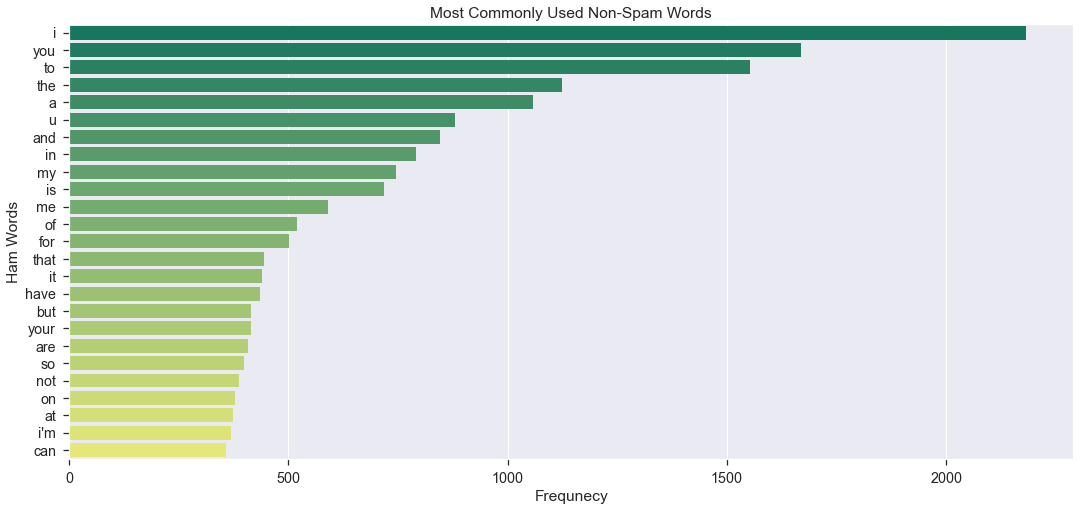

In [24]:
all_ham_words = []
for sentence in data[data['Category'] == 1]['Message'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)

df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Non-Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

# Text vectorization

In [81]:
X = data["Message"]
y = data['Category']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [82]:
x_train.shape

(4457,)

In [83]:
cv=CountVectorizer()
x_train_counter=cv.fit_transform(x_train)

In [84]:
cv.get_feature_names() #columns

['00',
 '000',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '02',
 '0207',
 '02072069400',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '0789xxxxxxx',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '083',
 '08448350055',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 

In [85]:
count=pd.DataFrame(x_train_counter.toarray(),columns=cv.get_feature_names())
count

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zaher,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
model=MultinomialNB() 
model.fit(x_train_counter,y_train)

MultinomialNB()

In [87]:
model.score(cv.transform(x_test),y_test)

0.9829596412556054

prediciton

In [88]:
emails = [ 'Hey mohan, can we get together to watch footbal game tomorrow?',
'Upto 20% discount on parking, exclusive offer just for you. Dont miss this  reward!']

In [89]:
model.predict(cv.transform(emails)) #rand input an

array([1, 0], dtype=int64)

# pipline

In [90]:
from sklearn.pipeline import Pipeline

In [91]:
p=Pipeline([('cv',CountVectorizer()),('model',MultinomialNB())])

In [92]:
p.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('model', MultinomialNB())])

In [93]:
p.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
p.score(x_test,y_test)

0.9829596412556054

In [95]:
p.predict(['Free entry in 2 a wkly comp to win FA Cup fina...'])

array([0], dtype=int64)

# Model Evaluation

In [96]:
y_pred = p.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print(f'Accuracy of the model: {accuracy}')
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')

Accuracy of the model: 0.983
Precision Score of the model: 0.986
Recall Score of the model: 0.995


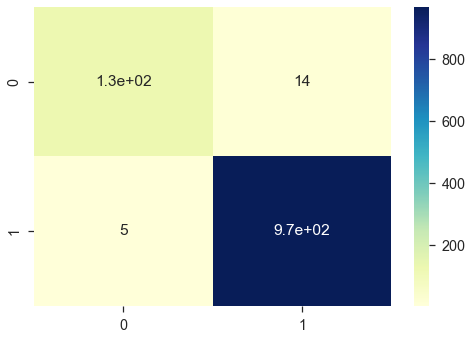

In [97]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='YlGnBu')
plt.show()